In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [172]:
df=pd.read_csv('SeaPlaneTravel.csv')
df.head()

,Month,#Passengers
0,2003-01,112
1,2003-02,118
2,2003-03,132
3,2003-04,129
4,2003-05,121


In [173]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [174]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


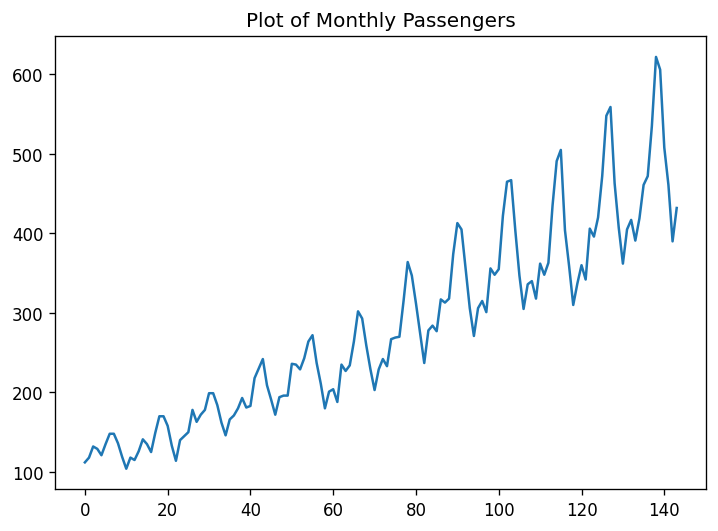

In [175]:
plt.figure(figsize = (7,5)) 
plt.plot(df["#Passengers"])
plt.title("Plot of Monthly Passengers")
plt.show()

In [176]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["#Passengers"])
print("ADF Statistic is :",result[0])
print("p-value is :",result[1])

ADF Statistic is : 0.8153688792060418
p-value is : 0.9918802434376409


non stationary

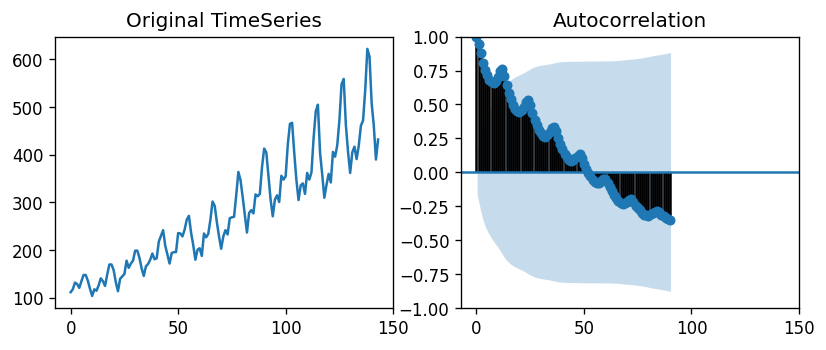

In [177]:
#import plot_acf from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

#Figure & Axis
plt.rcParams.update({'figure.figsize':(8,3), 'figure.dpi':120})
fig,axes = plt.subplots(1,2,sharex = True)

#Original timeseries plot
axes[0].plot(df["#Passengers"])
axes[0].set_title("Original TimeSeries") 
plot_acf(df["#Passengers"],lags = 90,ax = axes[1]) #90 time lags
plt.show()

In [178]:
!pip install pmdarima

In [179]:
from pmdarima.arima.utils import ndiffs

In [180]:
y=df['#Passengers']
ndiffs(y,test='kpss')

1

In [181]:
ndiffs(y,test='adf')

0

In [182]:
ndiffs(y,test='pp')

0

In [183]:
from pmdarima import auto_arima

In [209]:
model = auto_arima(df['#Passengers'], start_p=1, start_q=1,
                      test='kpss',       
                      max_p=10, max_q=10, 
                      m=1,              
                      d=None,           
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.32 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

In [210]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Fri, 11 Feb 2022   AIC                           1365.825
Time:                        06:12:22   BIC                           1389.528
Sample:                             0   HQIC                          1375.457
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.3

In [207]:
df.shape

(144, 2)

In [208]:
#p=4 d=1 q=3
train=df.iloc[:85]
test=df[85:]
train.head()

,Month,#Passengers
0,2003-01,112
1,2003-02,118
2,2003-03,132
3,2003-04,129
4,2003-05,121


In [244]:
model=auto_arima( train['#Passengers'],
                  test='kpss',       
                  max_p=5, max_q=4, 
                  m=1,              
                  d=1,          
                  seasonal=True,  
                  start_P=0, 
                  D=0, 
                  trace=True,
                  error_action='ignore',  
                  suppress_warnings=True, 
                  stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=755.130, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=753.589, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=751.952, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=753.913, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=750.542, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=750.659, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=751.692, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=749.185, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=750.439, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=752.121, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=744.714, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=750.387, Time=0.0

In [245]:
model.get_params

<bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>

In [246]:
model.set_params(order=(2,2,1))

ARIMA(order=(2, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [247]:
model.fit(train['#Passengers'])

ARIMA(order=(2, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [248]:
len(test)

59

In [249]:
forecast, confidence_interval = model.predict(n_periods = 59, return_conf_int = True, alpha=0.05)

In [250]:
forecast

array([278.92788077, 278.22926475, 280.92084294, 283.57716845,
       285.5276415 , 287.30552623, 289.18453088, 291.12477491,
       293.05983559, 294.98098763, 296.89966154, 298.82056306,
       300.74254152, 302.66433647, 304.58586328, 306.50735951,
       308.42890306, 310.35046495, 312.27202179, 314.19357357,
       316.1151251 , 318.03667761, 319.95823042, 321.8797831 ,
       323.80133569, 325.72288828, 327.64444089, 329.56599351,
       331.48754612, 333.40909873, 335.33065135, 337.25220396,
       339.17375657, 341.09530918, 343.01686179, 344.9384144 ,
       346.85996702, 348.78151963, 350.70307224, 352.62462485,
       354.54617746, 356.46773008, 358.38928269, 360.3108353 ,
       362.23238791, 364.15394052, 366.07549313, 367.99704575,
       369.91859836, 371.84015097, 373.76170358, 375.68325619,
       377.6048088 , 379.52636142, 381.44791403, 383.36946664,
       385.29101925, 387.21257186, 389.13412448])

In [251]:
confidence_interval

array([[238.80391944, 319.05184209],
       [213.48029167, 342.97823782],
       [201.63429994, 360.20738594],
       [193.50889321, 373.64544369],
       [185.52430576, 385.53097724],
       [177.76101899, 396.85003346],
       [170.63097226, 407.73808951],
       [164.07828563, 418.17126418],
       [157.91904264, 428.20062854],
       [152.05375962, 437.90821564],
       [146.44421805, 447.35510503],
       [141.06207856, 456.57904757],
       [135.87758401, 465.60749903],
       [130.86464808, 474.46402485],
       [126.00281525, 483.16891132],
       [121.27568619, 491.73903283],
       [116.66939319, 500.18841293],
       [112.17198928, 508.52894062],
       [107.77318979, 516.7708538 ],
       [103.46411587, 524.92303127],
       [ 99.23703896, 532.99321125],
       [ 95.08517736, 540.98817786],
       [ 91.00254499, 548.91391585],
       [ 86.98383246, 556.77573374],
       [ 83.02430868, 564.5783627 ],
       [ 79.11973904, 572.32603753],
       [ 75.26631768, 580.02256411],
 

In [252]:
test["forecast"] = forecast
test["lower_range"] = confidence_interval[:,0]
test["upper_range"] = confidence_interval[:,1]
test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Month,#Passengers,forecast,lower_range,upper_range
85,2011-02,277,278.927881,238.803919,319.051842
86,2011-03,317,278.229265,213.480292,342.978238
87,2011-04,313,280.920843,201.634300,360.207386
88,2011-05,318,283.577168,193.508893,373.645444
89,2011-06,374,285.527642,185.524306,385.530977


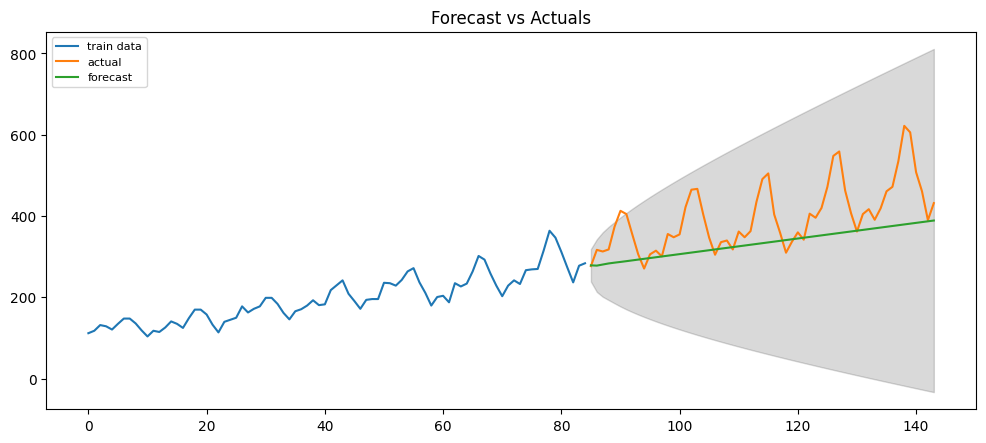

In [253]:
#Create Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train["#Passengers"], label='train data')
plt.plot(test["#Passengers"], label='actual')
plt.plot(test["forecast"], label='forecast')
plt.fill_between(test.index, test["lower_range"], test["upper_range"], 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8) 
plt.show()

In [254]:
from pmdarima.metrics import smape

In [255]:
mpe=smape(test['#Passengers'],test['forecast'])
mpe

17.230506479134682

In [257]:
print(f'Model is {100-mpe}% accurate.')

Model is 82.76949352086532% accurate.


#Forecast for next 30 days

In [260]:
model = auto_arima(df['#Passengers'], start_p=1, start_q=1,
                      test='kpss',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=2,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1450.596, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1447.027, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1440.078, Time=0.11 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=1437.879, Time=0.20 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=1419.706, Time=0.30 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=1420.109, Time=0.33 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.56 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.77 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=0.77 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=1421.692, Time=0.35 sec

Best model:  ARIMA(4,2,0)(0,0,0)[0]          
Total fit time: 4.065 seconds


In [261]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 2, 0)   Log Likelihood                -704.853
Date:                Fri, 11 Feb 2022   AIC                           1419.706
Time:                        06:28:15   BIC                           1434.485
Sample:                             0   HQIC                          1425.712
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3496      0.095     -3.668      0.000      -0.536      -0.163
ar.L2         -0.4159      0.095     -4.396      0.000      -0.601      -0.230
ar.L3         -0.2744      0.070     -3.902      0.0

In [262]:
model.fit(df['#Passengers'])

ARIMA(order=(4, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

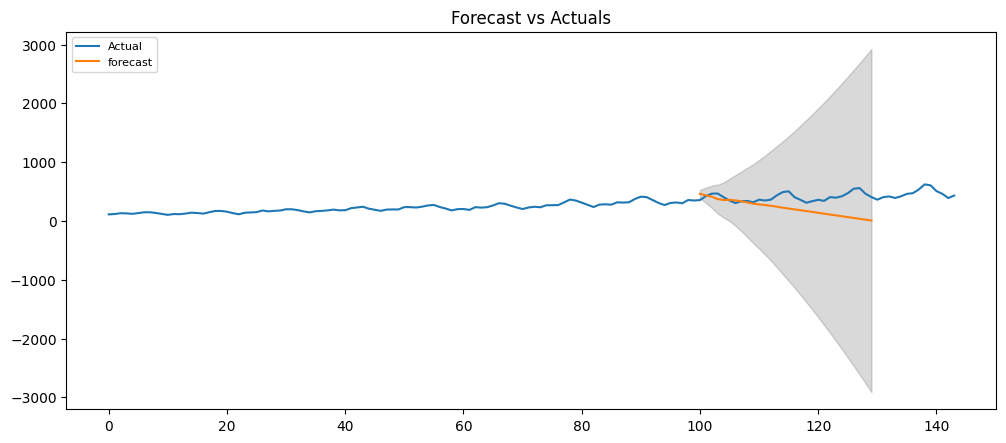

In [263]:
forecast, confidence_interval = model.predict(n_periods = 30, return_conf_int = True, alpha=0.05)
predict = pd.DataFrame() 
predict["forecast"] = forecast
predict["lower_range"] = confidence_interval[:,0]
predict["upper_range"] = confidence_interval[:,1]
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df["#Passengers"], label='Actual')
plt.plot(np.arange(100,130),predict["forecast"], label='forecast')
plt.fill_between(np.arange(100,130), predict["lower_range"], predict["upper_range"], 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()